In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_excel("Sales Analyst Intern Test.xlsx")

In [28]:
df.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Day,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3,NaN,NaN,NaN,NaN
1,1,265,365,438,NaN,NaN,NaN,NaN


In [29]:
df.isnull().sum()

Unnamed: 0     3
Unnamed: 1     4
Unnamed: 2     4
Unnamed: 3     4
Unnamed: 4    25
Unnamed: 5    25
Unnamed: 6    25
Unnamed: 7    25
dtype: int64

In [30]:
df.dtypes

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
Unnamed: 7    float64
dtype: object

In [31]:
## drop null columns
df.drop(df.columns[[4, 5, 6, 7]], axis = 1, inplace = True)

In [32]:
# drop null values
df.dropna(inplace=True)

In [33]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Day,Test Count - Month 1,Test Count - Month 2,Test Count - Month 3
1,1,265,365,438
2,2,455,325,361
3,3,357,405,345
4,4,533,506,310


In [34]:
#rename columns
df.rename(columns = {'Unnamed: 0':'day', 'Unnamed: 1':'month_1',
                              'Unnamed: 2':'month_2','Unnamed: 3':'month_3'}, inplace = True)

In [35]:
df.drop(df.index[[0]],inplace=True)

### let's concat all months data in one column

In [59]:
## append columns on basis of month order
data = pd.DataFrame()
data['month'] = df['month_1'].append([df['month_2'], df['month_3']], ignore_index = False)

In [73]:
## change month type as int
data['month'] = data['month'].astype(int)

### create date column 
here we are asssuming month and year 

In [101]:
data['day'] = data.index

In [113]:
data['year'] = int(2021)

In [153]:
data['month_']= 1

In [161]:
data['month_'][20:40] = 2

<ipython-input-161-203b07fef12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_'][20:40] = 2
C:\Users\HP\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [163]:
data['month_'][40:60] = 3

<ipython-input-163-44681f39a74b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_'][40:60] = 3
C:\Users\HP\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [170]:
data.rename(columns = {'month':'sales', 'month_':'month'}, inplace = True)

In [175]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [177]:
data = data.drop(['day', 'year', 'month'], axis = 1)
data.set_index('date',inplace=True)

In [354]:
data.head(2)

,sales,forecast
date,,
2021-01-01,265,NaN
2021-01-02,455,NaN


In [180]:
data.describe()

,sales
count,60.000000
mean,383.700000
std,113.669503
min,123.000000
25%,321.250000
50%,391.500000
75%,447.250000
max,832.000000


### now we can visualize our data 

<AxesSubplot:xlabel='date'>

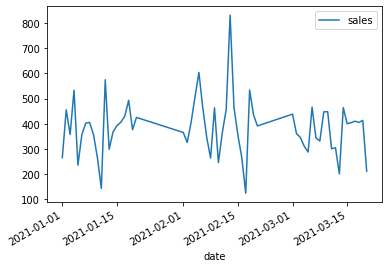

In [181]:
## data seems it is stationary but we will confirms it by using adfuller test and ndiffs 
data.plot()

In [259]:
 ### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

### adfuller test

In [184]:
test_result=adfuller(data['sales'])

In [185]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [188]:
adfuller_test(data['sales'])

ADF Test Statistic : -7.050375172935646
p-value : 5.546478774257802e-10
#Lags Used : 0
Number of Observations Used : 59
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### pmdarma test

because ndiffs says 0 means we don't have to get diffrence

In [234]:
from pmdarima.arima.utils import ndiffs

In [235]:
ndiffs(data.sales, test='adf')

0

## autucorrelation 

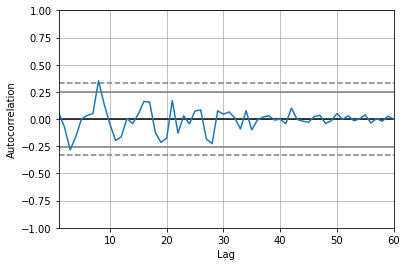

In [192]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['sales'])
plt.show()

### acf and pacf

In [193]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

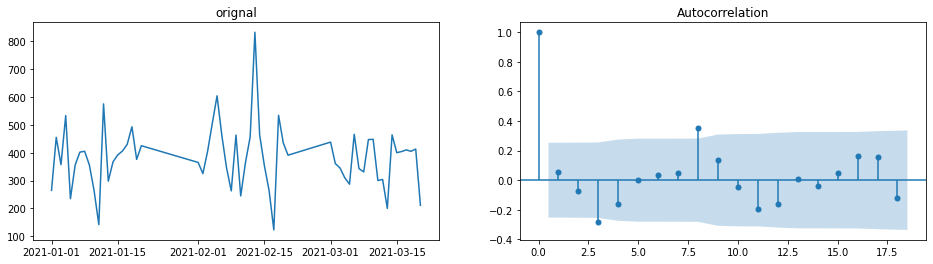

In [202]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,4))
ax1.plot(data.sales)
ax1.set_title('orignal')
plot_acf(data.sales, ax=ax2);

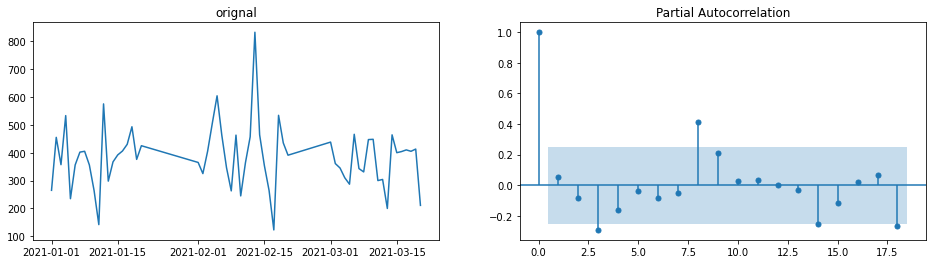

In [203]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(16,4))
ax1.plot(data.sales)
ax1.set_title('orignal')
plot_pacf(data.sales, ax=ax2);

### Fit the model

In [264]:
# For non-seasonal data
# acf > p,diff > d,pacf > q
from statsmodels.tsa.arima_model import ARIMA

In [316]:
model=ARIMA(data['sales'],order=(7,0,7))
model_fit=model.fit()

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency inf

In [317]:
model_fit.summary()

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   60
Model:                     ARMA(7, 7)   Log Likelihood                -356.887
Method:                       css-mle   S.D. of innovations             83.831
Date:                Mon, 12 Jul 2021   AIC                            745.774
Time:                        16:46:57   BIC                            779.284
Sample:                             0   HQIC                           758.881
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         383.9748      9.859     38.945      0.000     364.651     403.299
ar.L1.sales    -0.8634        nan        nan        nan         nan         nan
ar.L2.sales    -0.4378        nan        nan        nan         nan         nan
ar.L3.sales    -0.4189        nan        nan        nan         nan         nan
ar.L4.sales    -0.4921        nan        nan        nan         nan         nan
ar.L5.sales    -0.3754        nan        nan        nan         nan         nan
ar.L6.sales    -0.4940        nan        nan        nan         nan         nan
ar.L7.sales    -0.7658        nan        nan        nan         nan         nan
ma.L1.sales     0.8722        nan        nan        nan         nan         nan
ma.L2.sales     0.3566        nan        nan        nan         nan         nan
ma.L3.sales    -0.0163      0.066     -0.245      0.806      -0.146       0.114
ma.L4.sales    -0.0138      0.069     -0.201      0.841      -0.149       0.121
ma.L5.sales     0.3594        nan        nan        nan         nan         nan
ma.L6.sales     0.8709        nan        nan        nan         nan         nan
ma.L7.sales     0.9984        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0001           -0.0000j            1.0001           -0.5000
AR.2           -0.7354           -0.6777j            1.0000           -0.3815
AR.3           -0.7354           +0.6777j            1.0000            0.3815
AR.4            0.8399           -0.6551j            1.0652           -0.1054
AR.5            0.8399           +0.6551j            1.0652            0.1054
AR.6            0.0729           -1.0702j            1.0727           -0.2392
AR.7            0.0729           +1.0702j            1.0727            0.2392
MA.1            0.8479           -0.5302j            1.0000           -0.0889
MA.2            0.8479           +0.5302j            1.0000            0.0889
MA.3           -0.0493           -0.9996j            1.0008           -0.2578
MA.4           -0.0493           +0.9996j            1.0008            0.2578
MA.5           -0.7347           -0.6784j            1.0000           -0.3813
MA.6           -0.7347           +0.6784j            1.0000            0.3813
MA.7           -1.0000           -0.0000j            1.0000           -0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

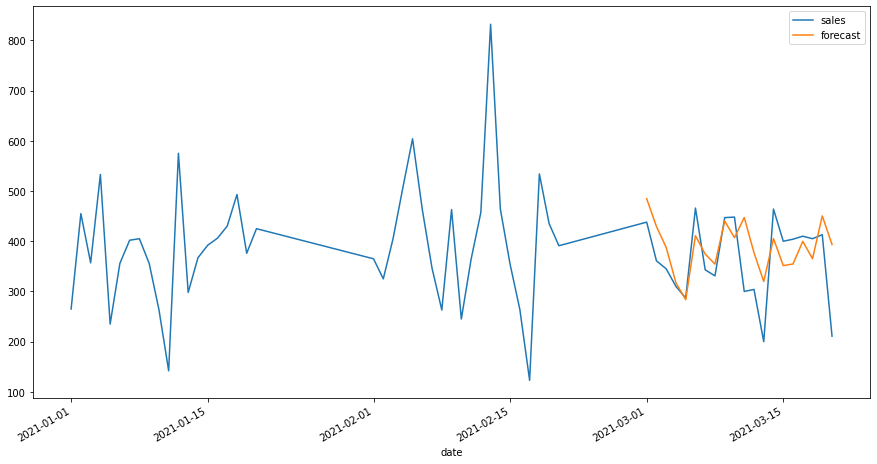

In [418]:
data['forecast']=model_fit.predict(start=40,end=59,dynamic=True)
data[['sales','forecast']].plot(figsize=(15,8))


## predict sales 

sales of next 20 days

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


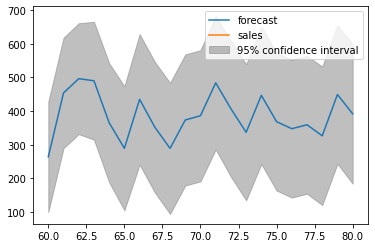

In [415]:
model_fit.plot_predict(start = 60, end = 80, dynamic= False);

In [417]:
model_fit.predict(start = 60, end = 80, dynamic= False)

C:\Users\HP\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


60    263.889922
61    453.873540
62    496.394983
63    490.241880
64    365.322883
65    289.315092
66    434.948114
67    352.148531
68    289.014970
69    373.537713
70    386.174629
71    484.000660
72    407.006007
73    336.851505
74    446.797643
75    368.540431
76    347.564051
77    359.295131
78    326.485253
79    449.324808
80    391.818891
dtype: float64